# Poisson equation over an L-shaped domain

We solve
$$
- u_{xx}-u_{yy} = 1, \qquad  \Omega = [-1,1]^2 \backslash [0,1]^2
$$
with Dirichlet boundary conditions everywhere,
$$
u(x,y)=0, \qquad (x,y)\in \partial \Omega.
$$

Please see DeepXDE [doc](https://deepxde.readthedocs.io/en/latest/demos/pinn_forward/poisson.Lshape.html) for fuller details.

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.000060 s

Training model...

Step      Train loss              Test loss               Test metric
0         [9.15e-01, 5.93e-02]    [9.13e-01, 5.93e-02]    []  
1000      [2.79e-04, 3.00e-03]    [2.11e-04, 3.00e-03]    []  
2000      [1.14e-04, 2.84e-03]    [8.72e-05, 2.84e-03]    []  
3000      [1.09e-04, 2.58e-03]    [7.95e-05, 2.58e-03]    []  
4000      [1.94e-04, 2.13e-03]    [1.46e-04, 2.13e-03]    []  
5000      [2.70e-04, 1.60e-03]    [2.16e-04, 1.60e-03]    []  
6000      [2.73e-04, 1.05e-03]    [2.37e-04, 1.05e-03]    []  
7000      [1.82e-04, 4.42e-04]    [1.31e-04, 4.42e-04]    []  
8000      [1.12e-04, 2.55e-04]    [9.07e-05, 2.55e-04]    []  
9000      [1.19e-04, 1.95e-04]    [1.23e-04, 1.95e-04]    []  
10000     [1.28e-04, 1.67e-04]    [1.29e-04, 1.67e-04]    []  
11000     [7.40e-05, 1.44e-04]    [6.20e-05, 1.44e-04]    []  
12000     [3.42e-05, 1.37e-04]    [2.75e-05, 1.37e-04]    []  
13000     [2.77e-05, 1.37e-04]    [2.16e-05, 1

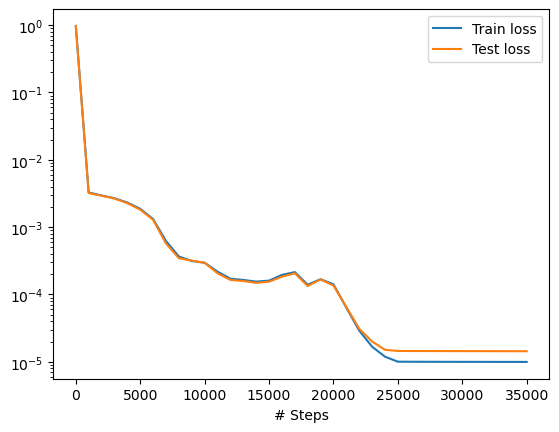

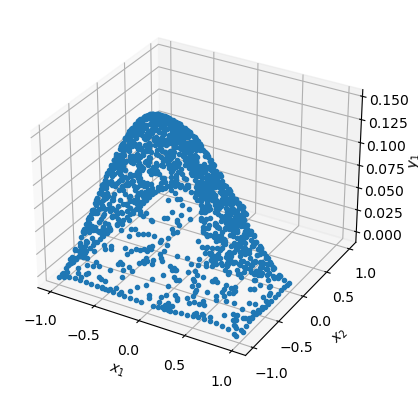

In [1]:
import deepxde as dde


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=20000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)